In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('~/Downloads/summary_metrics.csv')
df

,subject_id,AD_,ENMO,_MVPA_,dur_day_IN_unbt_min_pla,dur_day_total_LIG_min_pla,dur_day_total_MOD_min_pla,dur_day_total_VIG_min_pla,Nbouts_day_IN_bts_30_pla,Nbouts_day_IN_bts_30_wei,Nblocks_day_IN_bts_30_pla,Nblocks_day_IN_bts_30_wei,Nbouts_day_MVPA_bts_10_pla,Nbouts_day_MVPA_bts_10_wei,Nblocks_day_MVPA_bts_10_pla,Nblocks_day_MVPA_bts_10_wei,sleep_efficiency_wei,sleep_efficiency_pla
0,better_sub-GE120001,NaN,NaN,NaN,166.381,156.726,90.643,0.179,10.286,10.286,10.143,10.143,1.429,1.429,1.429,1.429,NaN,NaN
1,better_sub-GE120002,NaN,NaN,NaN,257.810,213.071,74.429,0.369,7.000,7.000,7.000,7.000,0.714,0.714,0.714,0.714,NaN,NaN
2,better_sub-GE120003,NaN,NaN,NaN,120.702,201.095,76.190,1.095,7.286,7.286,7.286,7.286,0.143,0.143,0.143,0.143,NaN,NaN
3,better_sub-GE120004,NaN,NaN,NaN,80.071,101.345,12.238,0.083,12.857,12.857,12.714,12.714,0.000,0.000,0.000,0.000,NaN,NaN
4,better_sub-GE120005,NaN,NaN,NaN,166.119,162.988,64.202,0.226,11.143,11.143,11.143,11.143,0.000,0.000,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,pacrd_sub-87,NaN,NaN,NaN,98.905,115.250,60.107,0.071,9.143,8.845,9.143,8.845,0.429,0.452,0.429,0.452,0.928,0.934
257,pacrd_sub-89,NaN,NaN,NaN,129.042,118.681,51.639,4.472,9.000,8.893,9.000,8.893,0.667,0.607,0.667,0.607,0.923,0.922
258,pacrd_sub-9,NaN,NaN,NaN,157.667,201.905,139.655,5.310,8.429,8.429,8.429,8.429,0.857,0.857,0.857,0.857,0.840,0.840
259,pacrd_sub-92,NaN,NaN,NaN,125.798,147.762,62.179,0.321,9.143,9.143,9.143,9.143,0.000,0.000,0.000,0.000,0.916,0.916


In [11]:
mvpa_bouts = df['Nbouts_day_MVPA_bts_10_pla']
mvpa_bouts.to_clipboard()

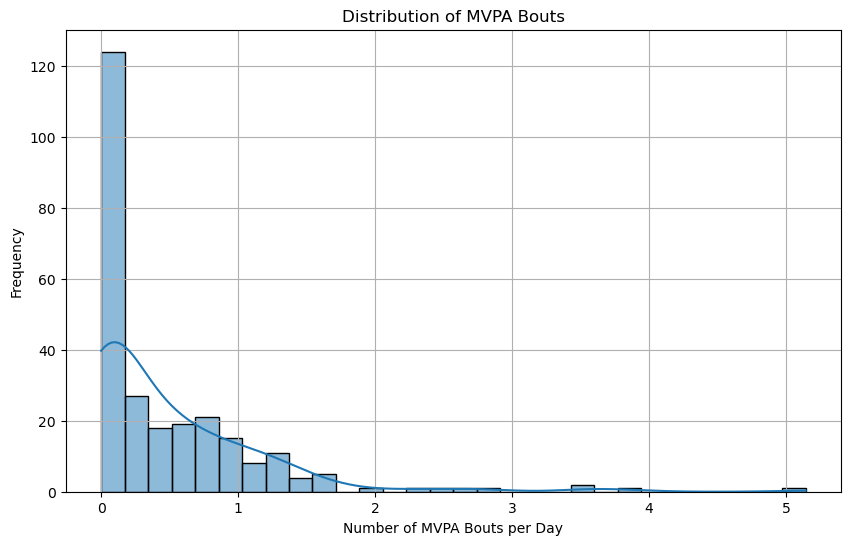

In [12]:
# Create a histogram of the MVPA bouts
plt.figure(figsize=(10, 6))
sns.histplot(mvpa_bouts, bins=30, kde=True)
plt.title('Distribution of MVPA Bouts')
plt.xlabel('Number of MVPA Bouts per Day')
plt.ylabel('Frequency')
plt.grid()

In [13]:
mvpa_bouts + 0.000000001

0      1.429000e+00
1      7.140000e-01
2      1.430000e-01
3      1.000000e-09
4      1.000000e-09
           ...     
256    4.290000e-01
257    6.670000e-01
258    8.570000e-01
259    1.000000e-09
260    1.143000e+00
Name: Nbouts_day_MVPA_bts_10_pla, Length: 261, dtype: float64

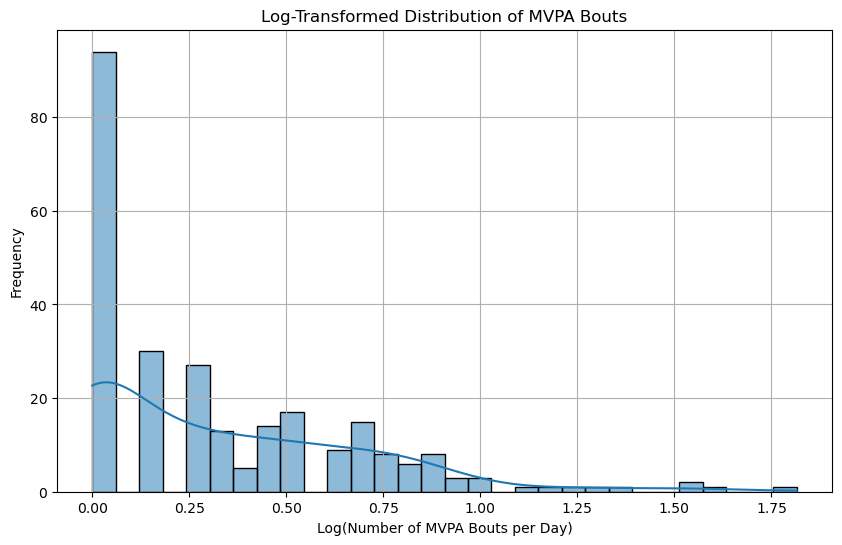

In [14]:
# Log-transform the MVPA bouts to handle skewness
mvpa_bouts_log = np.log1p(mvpa_bouts)  
# zscore
scaler = StandardScaler()
mvpa_bouts_z = scaler.fit_transform(mvpa_bouts_log.values.reshape(-1, 1)).flatten()
plt.figure(figsize=(10, 6))
sns.histplot(mvpa_bouts_log, bins=30, kde=True)
plt.title('Log-Transformed Distribution of MVPA Bouts')
plt.xlabel('Log(Number of MVPA Bouts per Day)')
plt.ylabel('Frequency')
plt.grid()


In [15]:

# Filter columns that start with 'dur'
dur_columns = df.columns[df.columns.str.startswith('dur')]
dur_df = df[dur_columns]
dur_df['sleep_efficiency'] = df['sleep_efficiency']  # Add sleep efficiency to the new DataFrame
# Create a new DataFrame with the filtered columns
dur_df.head()



KeyError: 'sleep_efficiency'

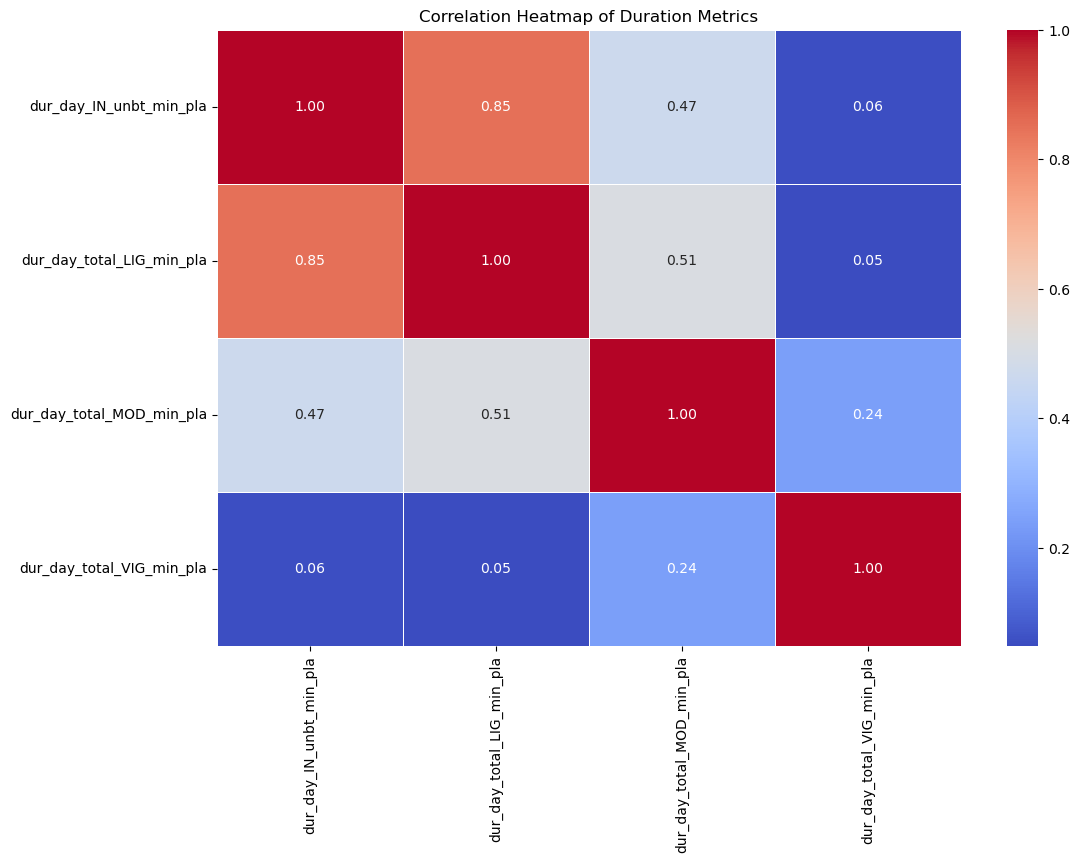

In [ ]:
''' # Create a heatmap of the duration metrics '''
plt.figure(figsize=(12, 8))
sns.heatmap(dur_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Duration Metrics')
plt.show()

In [ ]:
dur_columns

Index(['dur_day_IN_unbt_min_pla', 'dur_day_total_LIG_min_pla',
       'dur_day_total_MOD_min_pla', 'dur_day_total_VIG_min_pla'],
      dtype='object')

In [ ]:
''' kmeans clustering of the four duration metrics 
['dur_day_IN_unbt_min_pla', 'dur_day_total_LIG_min_pla',
       'dur_day_total_MOD_min_pla', 'dur_day_total_VIG_min_pla']

'''
from sklearn.cluster import KMeans
# Standardize the duration metrics
scaler = StandardScaler()
dur_df_scaled = scaler.fit_transform(dur_df)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dur_df_scaled)
# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['dur_day_IN_unbt_min_pla'], y=df['dur_day_total_MOD_min_pla'], hue=df['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Duration Metrics')
plt.xlabel('Duration of IN (unbroken) in minutes')
plt.ylabel('Total Duration of LIG in minutes')
plt.grid()
plt.show()

NameError: name 'StandardScaler' is not defined